# Exercice Arbres de regression 

Premier exercice de prise en main des arbres de régression. 

On va essayer de prévoir la taille de quelqu'un à partir de son sexe (homme / femme). C'est con comme exemple, mais ça donne une bonne idée du fonctionnement de la chose... 


## Création du dataset

On va démarrer par la construction d'un dataset bidon, avec des valeurs plus ou moins aléatoires. On va organiser la population en 2 types : les petits et les grands pour chaque sexe.   

- créer quatre *arrays* avec des valeurs aléatoires de taille. Utiliser l'opération **random.normal** de la bibliothèque **numpy** pour générer quatre ensembles avec les moyennes de 155, 165, 175 et 185 ;  
- concatener ("coller") les deux premiers ensembles dans un seul *array* ***height_f*** (taille femmes), à l'aide de l'opération **concatenate** de la bibliothèque **numpy**. Faites la même chose pour les deux autres arrays, en créant alors un *array* ***height_m*** (taille homme) ;
- afficher les 10 premiers valeurs de l'array ***height_f*** (utiliser le slice ***height_f [0:10]***) et les 10 derniers valeurs de l'array ***height_m*** (utiliser le slice ***height_m[190:200]***). 


In [29]:
import numpy as np

n = 200

height_pop1_f = np.random.normal( loc=155, scale=4, size=n )
height_pop1_m = np.random.normal( loc=175, scale=5, size=n )

height_pop2_f = np.random.normal( loc=165, scale=15, size=n )
height_pop2_m = np.random.normal( loc=185, scale=12, size=n )

height_f = np.concatenate([height_pop1_f, height_pop2_f])
height_m = np.concatenate([height_pop1_m, height_pop2_m])

print ('height_f:', len(height_f), height_f[0:10], height_f.mean() )
print ('height_m:', len(height_m), height_m[190:200], height_m.mean() )


height_f: 400 [153.10840807 148.93717758 157.25518367 157.77224874 150.73048092
 152.76141122 151.72800785 159.29357095 152.41839795 154.91343139] 160.60485519856093
height_m: 400 [184.15563    177.50523298 175.64947179 172.86180107 172.53357709
 180.1767585  174.74256893 169.45672219 178.28508931 172.35730712] 180.7822104081385


Maintenant qu'on a les array avec les données aléatoires, on va pouvoir créer un ***DataFrame*** avec l'ensemble de valeurs.
- créer un DataFrame ***df_height*** avec une colonne "*Gender*" et une colonne "*Height*" comme suit :
> df_height = pnd.DataFrame(
    {
        'Gender': [1 for i in range(height_f.size)] + [2 for i in range(height_m.size)],
        'Height': np.concatenate((height_f, height_m))
    }
)
- utiliser l'opération ***sample*** des DataFrames pour afficher 5 lignes aléatoires du DataFrame qu'on vient de créer
- utiliser l'opération ***describe*** des DataFrames pour avoir une description de DataFrame qu'on vient de créer
- que nous renseigne l'opération suivante :
> df_height.groupby(by='Gender').agg(['mean', 'median', 'max', 'min']) 


In [30]:
import pandas as pnd

df_height = pnd.DataFrame(
    {
        'Gender': [1 for i in range(height_f.size)] + [2 for i in range(height_m.size)],
        'Height': np.concatenate((height_f, height_m))
    }
)

df_height.sample(5)

,Gender,Height
51,1,155.316632
381,1,155.751699
538,2,180.463322
696,2,164.332555
762,2,189.511256


In [31]:
df_height.describe()

,Gender,Height
count,800.000000,800.000000
mean,1.500000,170.693533
std,0.500313,15.108759
min,1.000000,133.734576
25%,1.000000,157.797142
50%,1.500000,171.154099
75%,2.000000,180.526752
max,2.000000,215.745050


In [32]:
df_height.groupby(by='Gender').agg(['mean', 'median', 'max', 'min'])

Height                                    
              mean      median         max         min
Gender                                                
1       160.604855  157.819780  205.804207  133.734576
2       180.782210  178.457606  215.745050  154.497211

On peut essayer d'afficher les données du DataFrame qu'on vient de créer dans un graphique.  

Text(0.5, 0, 'Height (in centimeters)')

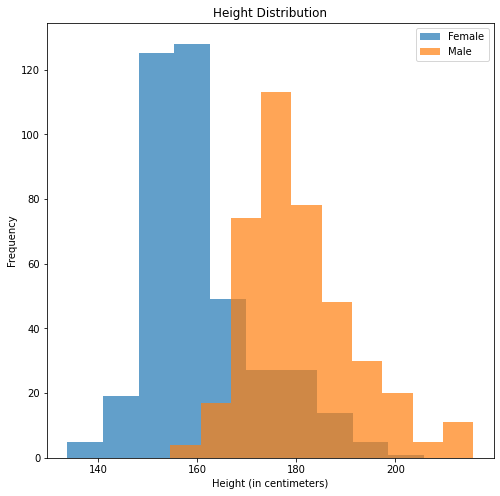

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
df_height[df_height['Gender'] == 1]['Height'].plot (
                                             label='Female', kind='hist', alpha=0.7, ax=ax )

df_height[df_height['Gender'] == 2]['Height'].plot (
                                             label='Male', kind='hist', alpha=0.7, ax=ax )
ax.legend()
ax.set_title('Height Distribution')
ax.set_xlabel('Height (in centimeters)')


## Division des données en training et test

- diviser le DataFrame en training et test (proportion 70% / 30%) à l'aide de l'opération ***train_test_split***
- afficher les premières lignes du dataset de training à l'aide de l'opération ***head***
- séparer les *features* et *target* des datasets training et test. Par exemple : 
> x_train = df_train [['Gender']]
- afficher trois lignes aléatoires du dataset ***x_train*** à l'aide de l'opération ***sample***.  


In [34]:
from sklearn.model_selection import train_test_split 

df_train, df_test = train_test_split( df_height, test_size=0.3) 

print ('Train:', df_train.shape, 'Test:', df_test.shape)

df_train.head()

Train: (560, 2) Test: (240, 2)


,Gender,Height
707,2,180.550224
741,2,179.607868
38,1,160.151867
546,2,183.507512
283,1,159.566868


In [35]:
x_train = df_train [['Gender']]
y_train = df_train [['Height']]

x_train.sample(3)

,Gender
502,2
455,2
104,1


## Créer et entrainer le modèle

Une fois les datasets training et test préparés, on va pouvoir entrainer et tester le modèle.

- créer deux modèles d'arbres de régression, un avec le critère ***mae*** et l'autre avec le critère ***mse***.
- entrainer les deux modèles avec les données de training. 
- afficher la profondeur de deux arbres créées avec l'opération ***get_depth()***
- visualiser les deux arbres crées

In [36]:
from sklearn.tree import DecisionTreeRegressor

#selon la version installée mae/mse ou absolute_error/squared_error
#rgmae = DecisionTreeRegressor(criterion='absolute_error')
rgmae = DecisionTreeRegressor(criterion='mae')

#rgmse = DecisionTreeRegressor(criterion='squared_error')
rgmse = DecisionTreeRegressor(criterion='mse') 

rgmse.fit(x_train, y_train)
rgmae.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mae')

In [37]:
from sklearn.tree import export_text

print ('Depth MAE : ', rgmae.get_depth(), 'MSE :', rgmse.get_depth())

print ('Tree MAE ')
print (export_text(rgmae))

print ('Tree MSE ')
print (export_text(rgmse))


Depth MAE :  1 MSE : 1
Tree MAE 
|--- feature_0 <= 1.50
|   |--- value: [157.79]
|--- feature_0 >  1.50
|   |--- value: [178.23]

Tree MSE 
|--- feature_0 <= 1.50
|   |--- value: [160.63]
|--- feature_0 >  1.50
|   |--- value: [180.51]



On peut également les visualiser sous forme graphique.

[Text(152.1818181818182, 326.15999999999997, 'Gender <= 1.5\nmse = 224.879\nsamples = 560\nvalue = 170.637'),
 Text(76.0909090909091, 108.72000000000003, 'mse = 133.292\nsamples = 278\nvalue = 160.626'),
 Text(228.27272727272728, 108.72000000000003, 'mse = 118.937\nsamples = 282\nvalue = 180.507')]

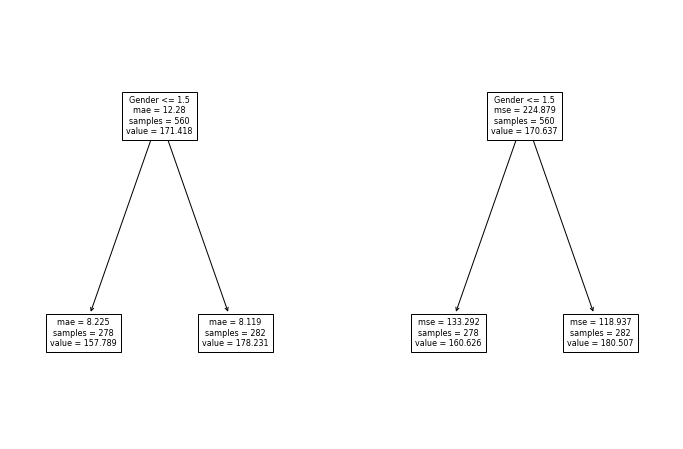

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

%matplotlib inline
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

plot_tree(rgmae, feature_names=['Gender'], fontsize=8, ax=axs[0] )
plot_tree(rgmse, feature_names=['Gender'], fontsize=8, ax=axs[1] )

In [41]:
df_height.groupby(by='Gender').agg(['mean', 'median'])

Height            
              mean      median
Gender                        
1       160.604855  157.819780
2       180.782210  178.457606

## Evaluer le modèle

- utiliser les données de tests avec les deux arbres qu'on vient d'entrainer
- afficher les 5 premières données de prévision obtenus avec les arbres (utiliser le *slice* **[0:5]**)
- utiliser les mesures d'évaluation ***mean_squared_error*** et ***mean_absolute_error*** (sur laquelle on va appliquer la fonction ***sqrt*** de la bibliothèque ***math***) pour évaluer les deux arbres 
- afficher les résultats obtenus dans les évaluations. 

In [39]:
y_pred_mae = rgmae.predict(df_test[['Gender']])
y_pred_mse = rgmse.predict(df_test[['Gender']])

print (y_pred_mae[0:5])
print (y_pred_mse[0:5])
print (df_test['Height'].head(5))

[178.23055478 178.23055478 178.23055478 157.78884456 157.78884456]
[180.50727529 180.50727529 180.50727529 160.62553732 160.62553732]
451    169.231414
709    190.055462
662    166.761819
166    152.797851
212    142.198341
Name: Height, dtype: float64


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

mse_Tmae = mean_squared_error(df_test['Height'], y_pred_mae) 
mae_Tmae = mean_absolute_error(df_test['Height'], y_pred_mae)
rmse_Tmae = sqrt(mse_Tmae)

mse_Tmse = mean_squared_error(df_test['Height'], y_pred_mse) 
mae_Tmse = mean_absolute_error(df_test['Height'], y_pred_mse)
rmse_Tmse = sqrt(mse_Tmse)

print ("Arbre critère   MAE     MSE ")
print ("        MSE : ", round(mse_Tmae, 3), round(mse_Tmse, 3))
print ("        MAE :", round(mae_Tmae,3), round(mae_Tmse,3) )
print ("       RMSE :", round(rmse_Tmae,3) , round(rmse_Tmse,3))


Arbre critère   MAE     MSE 
        MSE :  135.202 126.672
        MAE : 8.515 8.721
       RMSE : 11.628 11.255
